# Анна Тимошенко (Дата Аналитик)
# Задание #3 Data Analysis

## Описание предоставленных данных
Фрейм test_price состоит из:
* Датасет - каталог товара с данными во вложении
* id: товар
* Brand:Бренд
* Category: категория
* SubCategory: подкатегория
* SellPrice: цена продажи

### Библиотеки Python

* [Pandas](http://pandas.pydata.org/)
- [Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [Easier data analysis in Python with pandas](http://www.dataschool.io/easier-data-analysis-with-pandas/)

## Разминка
**Как и в предыдущей лабораторной здесь запрещено использовать циклы, если это специально не оговорено.**
1. Описательная статистика
* Вывести самый частотный бренд, категорию, подкатегорию
*  Вывести по ним размах цен
*  Вывести Среднее значение или медиану (выбор обосновать)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("test_price.csv")

In [3]:
df

,id,Brand,SubCategoryNr,Category,SellPrice
0,452798,79,3488,36,10.92
1,599859,79,1485,36,112.04
2,183475,79,1485,36,25.09
3,552471,79,3282,36,1.40
4,589285,79,3282,36,2.28
...,...,...,...,...,...
672264,496149,19,4039,41,0.40
672265,496136,19,4039,41,0.43
672266,496137,19,4039,41,0.34
672267,496138,69,4039,41,0.95


In [4]:
# В случае, если есть более одного (например, два) самых частотных бренда и тп, Series.mode() покажет все, 
# в отличие от, например, 
# df.Brand.value_counts().idxmax()
df.Brand.mode()

0    369
dtype: int64

In [5]:
df.Category.mode()

0    13
dtype: int64

In [6]:
df.SubCategoryNr.mode()

0    82
dtype: int64

В нашем случае есть только одна мода в каждом случае

In [7]:
brand1 = df.Brand.mode().values[0]
category1 = df.Category.mode().values[0]
subcat1 = df.SubCategoryNr.mode().values[0]
print('Самые частотные:\n Бренд:', brand1, 
      '\n Категория:', category1, 
      '\n Подкатегория:', subcat1)

Самые частотные:
 Бренд: 369 
 Категория: 13 
 Подкатегория: 82


In [8]:
# Размах цен
brand_max = df[df.Brand == brand1].SellPrice.max()
brand_min = df[df.Brand == brand1].SellPrice.min()
brand_range = brand_max - brand_min
cat_max = df[df.Category == category1].SellPrice.max()
cat_min = df[df.Category == category1].SellPrice.min()
cat_range = cat_max - cat_min
subc_max = df[df.SubCategoryNr == subcat1].SellPrice.max()
subc_min = df[df.SubCategoryNr == subcat1].SellPrice.min()
subc_range = subc_max - subc_min
print('Максимальная, минимальная цена и размах самых частотных:\nБренда:',
      brand_max, '|', brand_min, '|', brand_range, '\nКатегории: ',
      cat_max, '|', cat_min, '|', cat_range, '\nПодкатегории: ',
      subc_max, '|', subc_min, '|', subc_range
     )

Максимальная, минимальная цена и размах самых частотных:
Бренда: 2712.34 | 0.02 | 2712.32 
Категории:  1735.73 | 0.17 | 1735.56 
Подкатегории:  1209.75 | 1.77 | 1207.98


Выбираю медиану, т.к. предполагаю, что распределение цен одного бренда/категории/подкатегории может быть несимметричным, и могут существовать выбросы, которые сильно повлияют на среднее, таким образом, что оно будет плохо подходить для оценки распределения цен

In [9]:
print('Медианы цен:\n Бренда:',
      df[df.Brand == brand1].SellPrice.median(), '\n Категории: ',
      df[df.Category == category1].SellPrice.median(), '\n Подкатегории: ',
      df[df.SubCategoryNr == subcat1].SellPrice.median()
     )

Медианы цен:
 Бренда: 16.73 
 Категории:  26.03 
 Подкатегории:  32.16


In [10]:
df[df.Brand == df.Brand.mode().values[0]].SellPrice.mean()

36.0158964282167

In [11]:
df[df.Category == df.Category.mode().values[0]].SellPrice.mean()

36.585712636012296

In [12]:
df[df.SubCategoryNr == df.SubCategoryNr.mode().values[0]].SellPrice.mean()

41.00640700993448

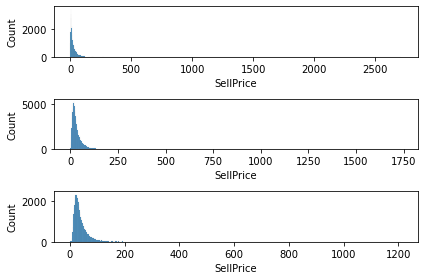

In [13]:
# Можем проверить простыми гистограммами распределения
fig, axes = plt.subplots(3, 1)

#create boxplot in each subplot
sns.histplot(data=df, x=df[df.Brand == brand1].SellPrice, ax=axes[0])
sns.histplot(data=df, x=df[df.Category == category1].SellPrice, ax=axes[1])
sns.histplot(data=df, x=df[df.SubCategoryNr == subcat1].SellPrice, ax=axes[2])

plt.tight_layout()


2. Сделать график Распределения иерархий(бренд, категория, подкатегория) по ценам
• Распределение (средняя цена / бренд) - берем топ 25-35 брендов
• Распределение (средняя цена / категория) берем топ 25-35 категорий
• Распределение (средняя цена / подкатегория) берем топ 25-35 подкатегорий

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

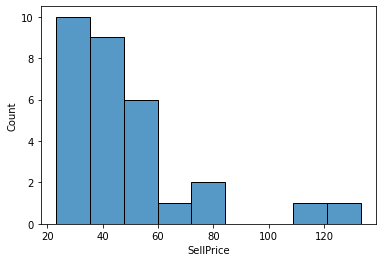

In [17]:
# Распределение средних цен топ-30 частотных брендов
topbrands = df.Brand.value_counts()[:30].index.tolist()
sns.histplot(data=df[df.Brand.isin(topbrands)], 
             x=df[df.Brand.isin(topbrands)].groupby('Brand')['SellPrice'].mean()
            )

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

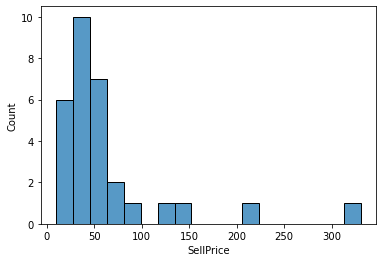

In [18]:
# Распределение средних цен топ-30 частотных категорий
topcategories = df.Category.value_counts()[:30].index.tolist()
sns.histplot(data=df[df.Category.isin(topcategories)], 
             x=df[df.Category.isin(topcategories)].groupby('Category')['SellPrice'].mean()
            )

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

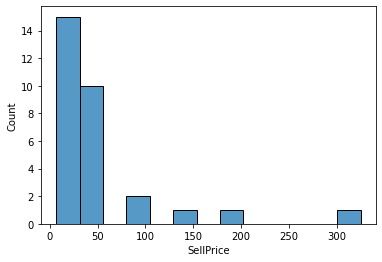

In [19]:
# Распределение средних цен топ-30 частотных подкатегорий
topsubcategories = df.SubCategoryNr.value_counts()[:30].index.tolist()
sns.histplot(data=df[df.SubCategoryNr.isin(topsubcategories)], 
             x=df[df.SubCategoryNr.isin(topsubcategories)].groupby('SubCategoryNr')['SellPrice'].mean()
            )


3. Построить диаграмму размаха boxplot иерархий по ценам
* Также как в задание выше (бренд, категория, подкатегория)

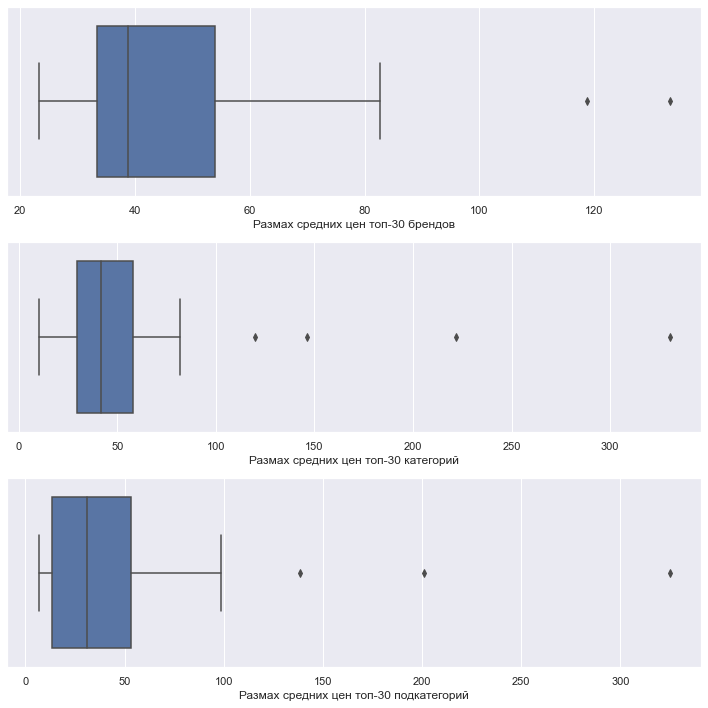

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
fig, axes = plt.subplots(3, 1)
sns.boxplot(data=df[df.Brand.isin(topbrands)],
            x=df[df.Brand.isin(topbrands)].groupby('Brand')['SellPrice'].mean(),
            ax=axes[0]
           )
axes[0].set_xlabel('Размах средних цен топ-30 брендов')
sns.boxplot(data=df[df.Category.isin(topcategories)],
            x=df[df.Category.isin(topcategories)].groupby('Category')['SellPrice'].mean(),
            ax=axes[1]
           )
axes[1].set_xlabel('Размах средних цен топ-30 категорий')
sns.boxplot(data=df[df.SubCategoryNr.isin(topsubcategories)],
            x=df[df.SubCategoryNr.isin(topsubcategories)].groupby('SubCategoryNr')['SellPrice'].mean(),
            ax=axes[2]
           )
axes[2].set_xlabel('Размах средних цен топ-30 подкатегорий')

plt.tight_layout()


4. Построить распределение интервалов цен по самому частотному бренду, категории, подкатегории (шаг интервала обосновать)

<AxesSubplot:xlabel='SellPrice'>

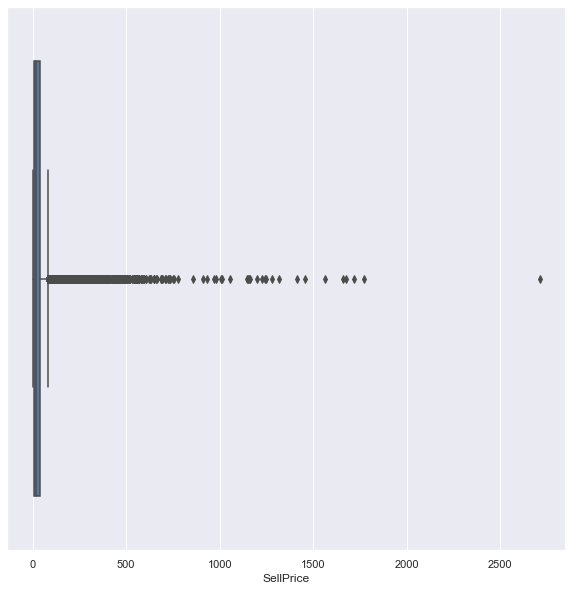

In [21]:
# построим боксплот, чтобы прикинуть распределение цен самого частотного бренда
sns.boxplot(data=df[df.Brand == brand1], x=df[df.Brand == brand1].SellPrice)

Мы видим, что есть большое количество значений выше 3 квартиля, (у гистограммы будет длинный "хвост" вправо) для удобства просмотра предлагаю отображать на гистограмме только значения цен, лежащие в промежутке до "уса", т.е. до 3 квартиля + 1.5 межквартильных размаха

In [22]:
q3 = df[df.Brand == brand1].SellPrice.quantile(0.75)
q1 = df[df.Brand == brand1].SellPrice.quantile(0.25)
pricelimit = 1.5*(q3 - q1) + q3
# Доля значений цен, которая не будет продемонстрирована на графике
df[(df.Brand == brand1) & (df.SellPrice > pricelimit)].shape[0] / df[(df.Brand == brand1)].shape[0]

0.08596159586110835

Можем воспользоваться правилом [Фридмана-Диакониса](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule) для определения ширины шага

In [23]:
bin_w = 2 * (q3 - q1) / (df[df.Brand == brand1].shape[0]**(1/3))

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

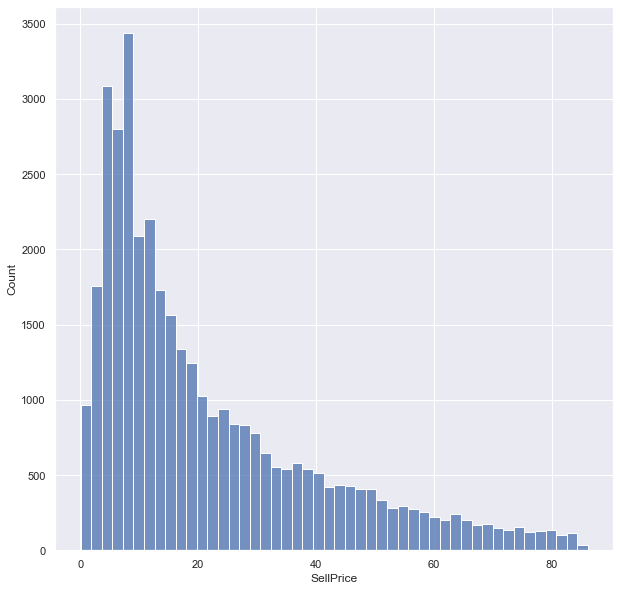

In [24]:
sns.histplot(data=df[(df.Brand == brand1) & (df.SellPrice <= pricelimit)], 
             x=df[(df.Brand == brand1) & (df.SellPrice <= pricelimit)].SellPrice, binwidth=bin_w
            )

Если мы хотим отобразить все данные на одном графике, включая выбросы, мы можем добавить выбросы в последнюю "корзину"

In [25]:
# Напишем функцию, которая будет присваивать слишком дорогостоящим продуктам нужное нам значение цены
# в интервале (pricelimit - bin_w)
pricelimit, (pricelimit - bin_w)

(84.77, 82.9765272368389)

In [26]:
# Допустим, 84
def set_sellprice(price):
    if price > 84.77:
        return 84.70
    else:
        return price

In [27]:
# Проделаем все необходимые действия на отдельном датафрейме
brand1_prices = df[df.Brand == brand1].copy()
brand1_prices['SellPrice'] = brand1_prices.loc[:, 'SellPrice'].apply(set_sellprice)

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

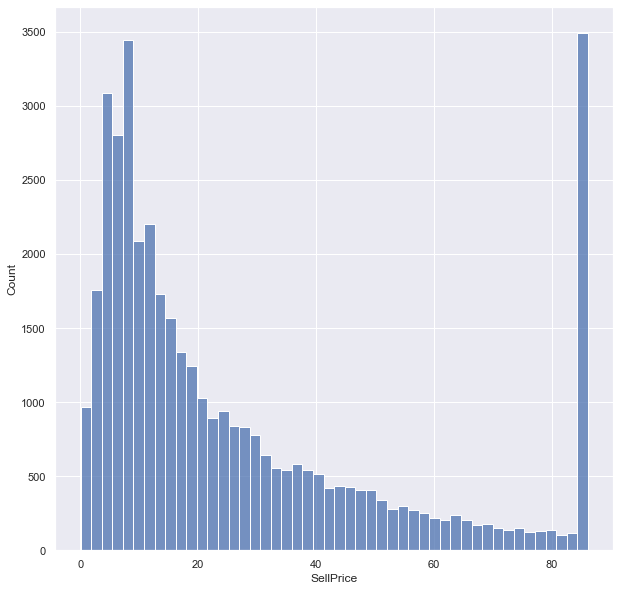

In [28]:
sns.histplot(data=brand1_prices, x=brand1_prices.SellPrice, binwidth=bin_w)

Таким образом мы получили гистограмму, демонстрирующую наличие большого количества выборосов, и позволяющую визуально сравнить их количество с количеством наблюдений в наиболее частых ценовых диапазонах.
Однако, такая визуализация может быть избыточной и вопрос о том, удалять выбросы перед визуализацией или добавлять их в последний интервал может решаться отдельно в каждом случае

Проделаем те же шаги для самой частотной категории и подкатегории

Так как выше, при ответе на первый вопрос, уже были построены гистограммы распределения самых частотных Категории и Подкатегории, мы уже представляем, что в их случаях будет та же ситуация (выбросы, длинный правый хвост). Это видно и если воспользоваться функцией describe()

In [29]:
df[df.Category == category1].SellPrice.describe()

count    200902.000000
mean         36.585713
std          35.615731
min           0.170000
25%          16.420000
50%          26.030000
75%          43.840000
max        1735.730000
Name: SellPrice, dtype: float64

In [30]:
df[df.SubCategoryNr == subcat1].SellPrice.describe()

count    62711.000000
mean        41.006407
std         32.089466
min          1.770000
25%         22.620000
50%         32.160000
75%         48.705000
max       1209.750000
Name: SellPrice, dtype: float64

75% значений цены самой частотной Категории - до 43.84, а подкатегории - до 48.71 при максимумах цен 1735.73 и 1209.75 соответственно

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

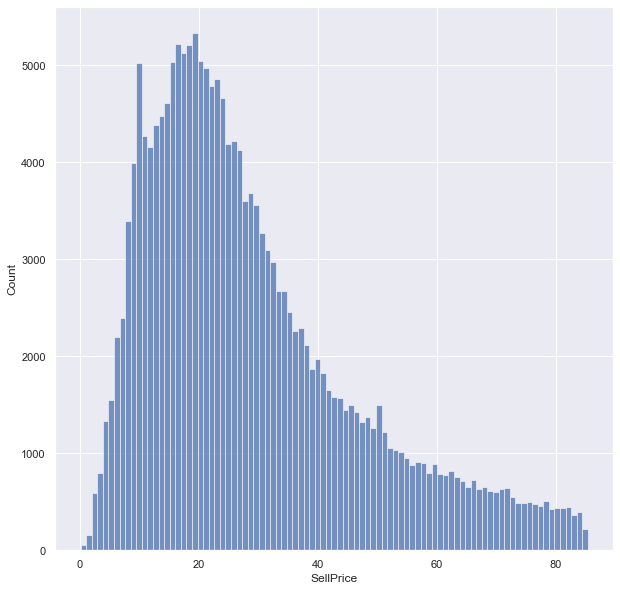

In [31]:
# Посчитаем лимит цен, по которому "отсечём" выбросы
q3 = df[df.Category == category1].SellPrice.quantile(0.75)
q1 = df[df.Category == category1].SellPrice.quantile(0.25)
pricelimit = 1.5*(q3 - q1) + q3
# Посчитаем размер интервалов
bin_w = 2 * (q3 - q1) / (df[df.Category == category1].shape[0]**(1/3))
# Построим график
sns.histplot(data=df[(df.Category == category1) & (df.SellPrice <= pricelimit)], 
             x=df[(df.Category == category1) & (df.SellPrice <= pricelimit)].SellPrice, binwidth=bin_w
            )

Интересно, что такой размер интервала демонстрирует наличие пика количества продуктов с ценой ~10, который мы бы не увидели, сделав интервал больше, например 4. Окончательный выбор интервала должен быть продиктован бизнес-логикой - для кого эта визуализация, какие инсайты мы хотим получить. О чём может говорить существование пика количества товаров стоимостью ~10 в данной категории? 

In [32]:
df[(df.Category == category1)].shape[0]

200902

Насколько значимо количество товаров порядка 5000 при общем количестве товаров в Категории: 200902 - это около 2.5%? Может быть цена ~10 является ожидаемой и комфортной для покупателей для какой-то определённой подкатегории товаров в этой категории или она продиктована какими-то другими причинами? Например, ограничениями при оплате через определённую платёжную систему, или со счёта мобильного телефона...

In [33]:
# Построим гистограмму с включёнными выбросами, для этого посмотрим последний интервал
pricelimit, (pricelimit - bin_w)

(84.97, 84.03365471905036)

In [34]:
# соответствующая функция для включения выбросов в последний интервал
def set_sellprice_с(price):
    if price > 84.97:
        return 84.5
    else:
        return price

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

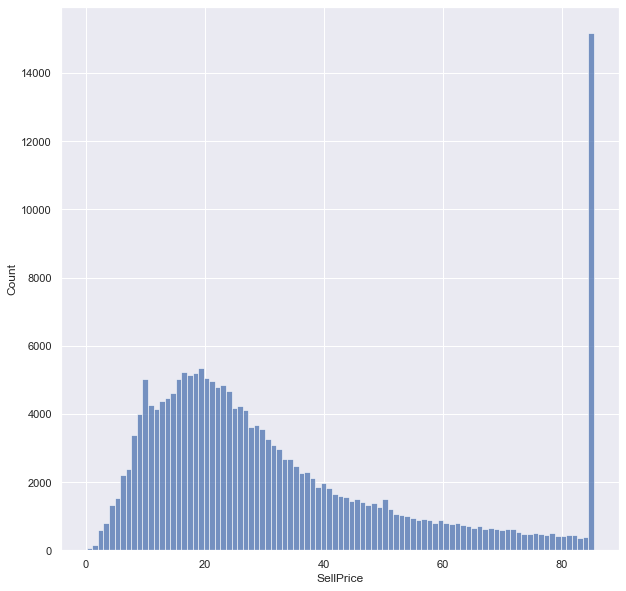

In [35]:
# Проделаем все необходимые действия на отдельном датафрейме
cat1_prices = df[df.Category == category1].copy()
cat1_prices['SellPrice'] = cat1_prices.loc[:, 'SellPrice'].apply(set_sellprice_с)
sns.histplot(data=cat1_prices, x=cat1_prices.SellPrice, binwidth=bin_w)

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

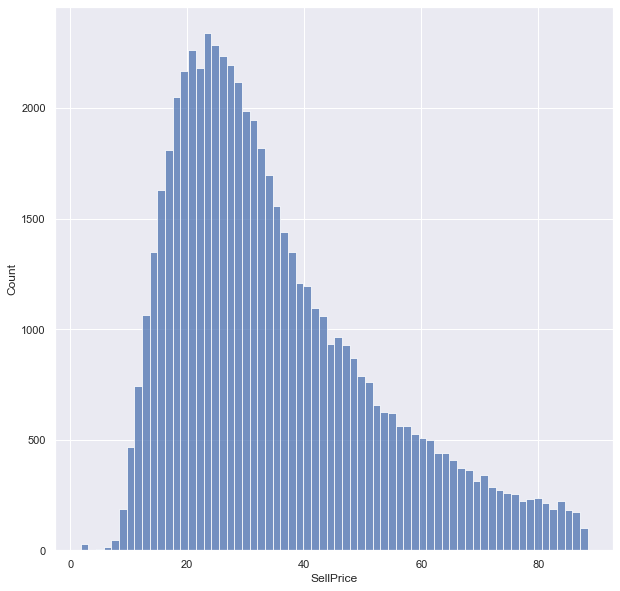

In [36]:
# Построим график для подкатегорий
q3 = df[df.SubCategoryNr == subcat1].SellPrice.quantile(0.75)
q1 = df[df.SubCategoryNr == subcat1].SellPrice.quantile(0.25)
pricelimit = 1.5*(q3 - q1) + q3
# Посчитаем размер интервалов
bin_w = 2 * (q3 - q1) / (df[df.SubCategoryNr == subcat1].shape[0]**(1/3))
# Построим график
sns.histplot(data=df[(df.SubCategoryNr == subcat1) & (df.SellPrice <= pricelimit)], 
             x=df[(df.SubCategoryNr == subcat1) & (df.SellPrice <= pricelimit)].SellPrice, binwidth=bin_w
            )

In [37]:
# Построим гистограмму с включёнными выбросами, для этого посмотрим последний интервал
pricelimit, (pricelimit - bin_w)

(87.8325, 86.51937442072722)

In [38]:
# Функция для включения выбросов в последний интервал
def set_sellprice_sc(price):
    if price > 87.8325:
        return 87.5
    else:
        return price

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

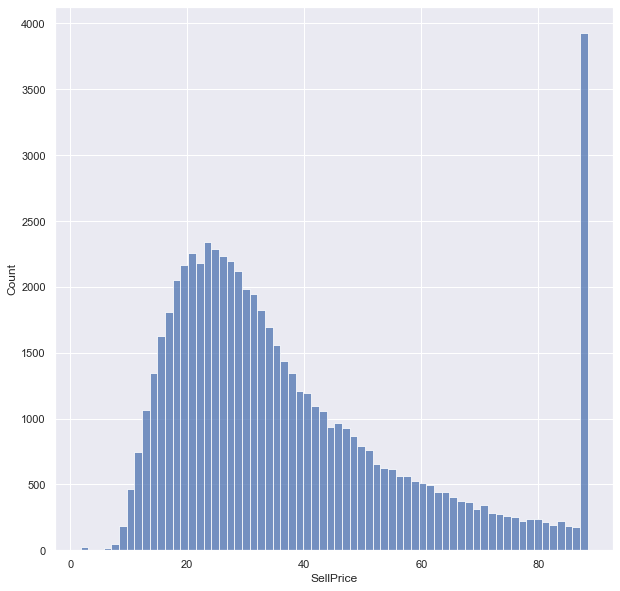

In [39]:
# Проделаем все необходимые действия на отдельном датафрейме
subcat1_prices = df[df.SubCategoryNr == subcat1].copy()
subcat1_prices['SellPrice'] = subcat1_prices.loc[:, 'SellPrice'].apply(set_sellprice_sc)
sns.histplot(data=subcat1_prices, x=subcat1_prices.SellPrice, binwidth=bin_w)


5. Сделать сегментацию по уровням цен по иерархии (внутри Brand/Category/SubCategory)
* Дополнительные знания найденные в датасете и инсайты приветствуются.


Посмотрим, как в принципе распределены цены товаров

<AxesSubplot:xlabel='SellPrice'>

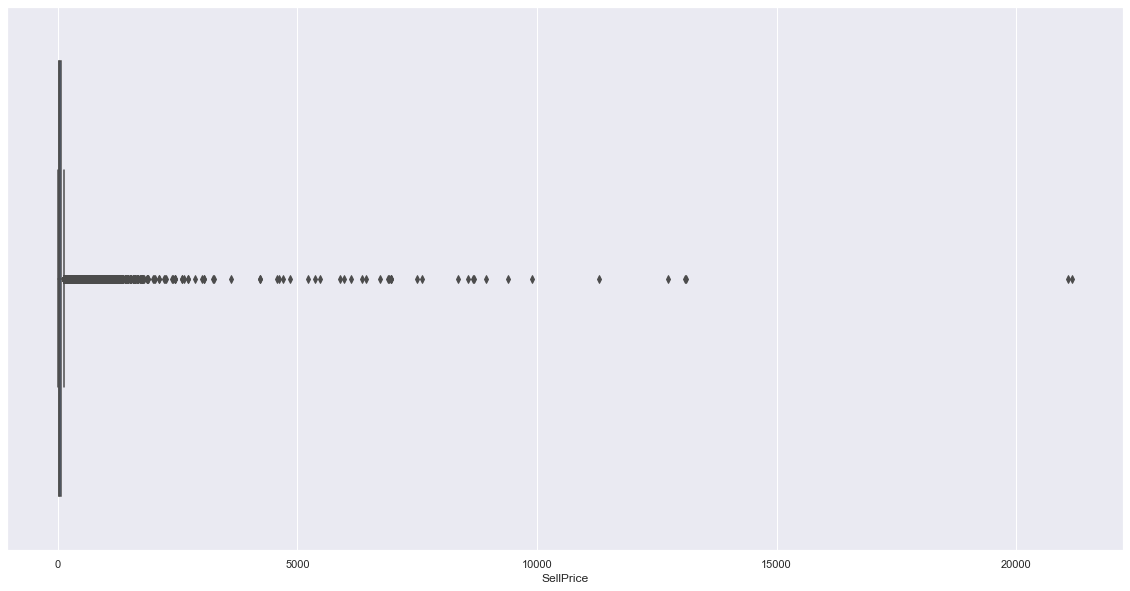

In [40]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df, x='SellPrice')

In [41]:
df.SellPrice.describe()

count    672269.000000
mean         51.835930
std         102.533874
min           0.020000
25%          12.790000
50%          26.990000
75%          56.560000
max       21176.350000
Name: SellPrice, dtype: float64

То есть у нас есть большая часть товаров (75%) - лежит в ценовом диапазоне до 56.56

<AxesSubplot:xlabel='SellPrice'>

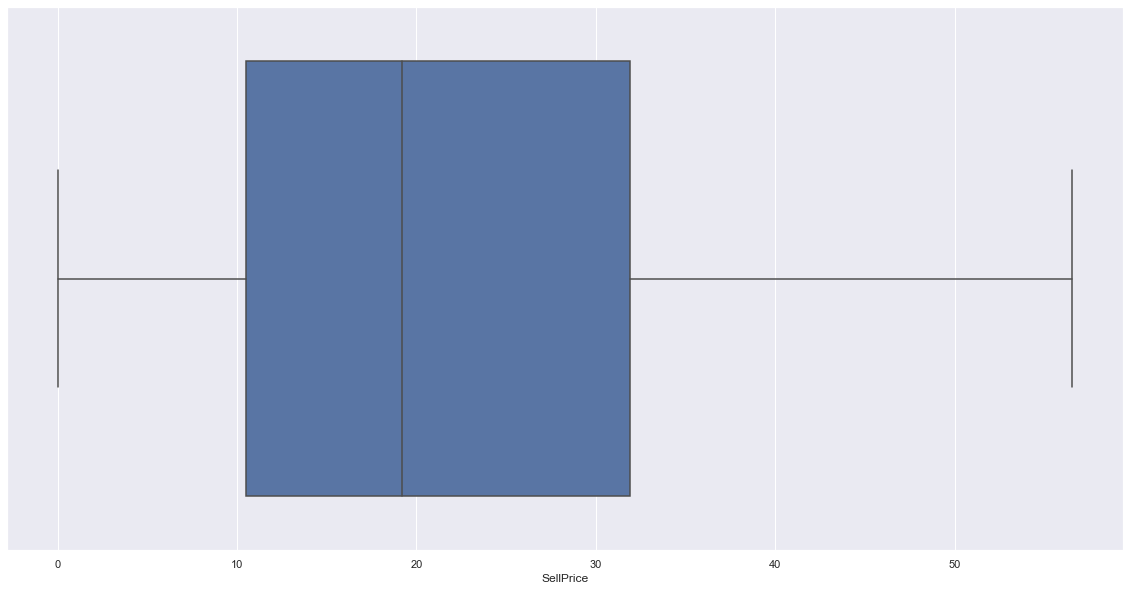

In [42]:
sns.set(rc={'figure.figsize':(20,10)})
sns.boxplot(data=df[df.SellPrice <= 56.56], x='SellPrice')

<AxesSubplot:xlabel='SellPrice', ylabel='Count'>

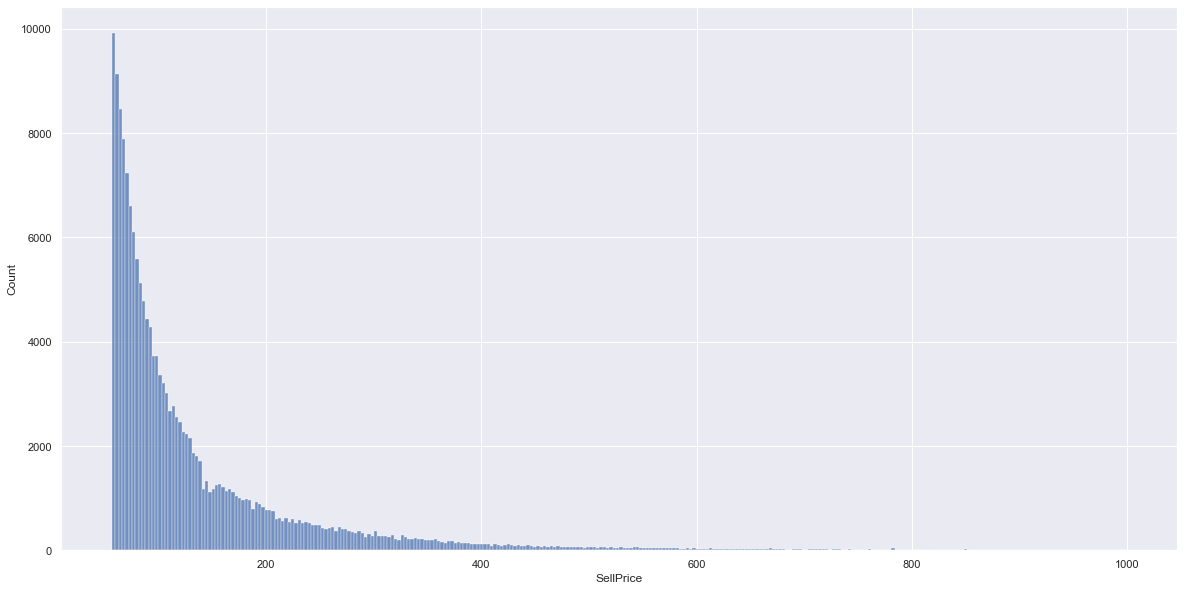

In [43]:
sns.set(rc={'figure.figsize':(20,10)})
sns.histplot(data=df[(df.SellPrice > 56.56) & (df.SellPrice <= 1000)], x='SellPrice')

Ценовая сегментация товаров конечно должна осуществляться на оценке рынка, будем считать, что представленный датасет хорошо отражает распределение цен на рынке

Принимая во внимание то, что медианная цена лучше отражает распределение цен внутри некоей категории, будем исходить из предположения, что 
* стоимость товаров нижней ценовой категории лежит в первом квартиле распределения цен
* средняя ценовая категория - это товары в промежутке между первым и третьим квартилем
* товары премиум-класса начинаются от цен на 20% выше, чем медианная цена в категории, 
* товары класса люкс - это товары стоимостью более чем в 10 раз выше, чем медианная цена

В разных категориях может быть разное распределение цен, попробуем определить категории и подкатегории продуктов (и бренды), в которые попали самые дорогостоящие товары 

In [44]:
# Какие Бренды, Категории и Подкатегории попали в самый высокий ценовой диапазон
df[df.SellPrice > (df.SellPrice.mean() * 10)].Brand.nunique(), \
df[df.SellPrice > (df.SellPrice.mean() * 10)].Category.nunique(), \
df[df.SellPrice > (df.SellPrice.mean() * 10)].SubCategoryNr.nunique()

(100, 27, 74)

Довольно много Брендов, Категорий и Подкатегорий встречаются среди товаров, которые мы определили как класс люкс

Вариант упрощённой визуализации ценовой сегментации Брендов, Категорий и Подкатегорий: три "корзины" представляют собой нижнюю ценовую категорию, среднюю и премиум-сегмент

(array([179., 123.,  16.]),
 array([  0,  25,  75, 100]),
 <BarContainer object of 3 artists>)

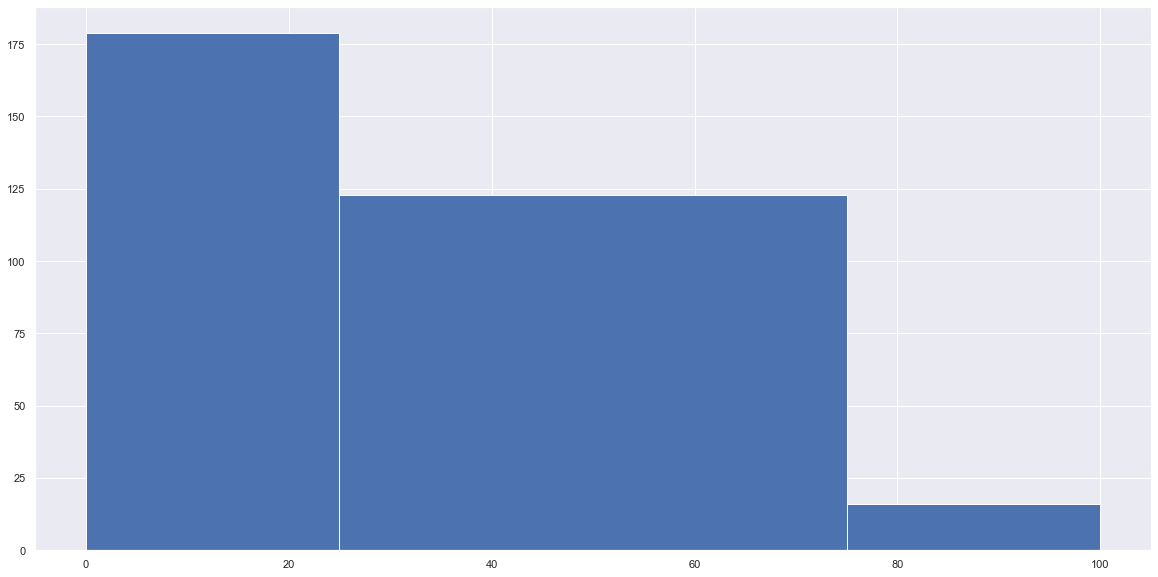

In [45]:
plt.hist(df.groupby('Brand')['SellPrice'].median(), bins=[0, 25, 75, 100])

(array([34., 16.,  2.]),
 array([  0,  25,  75, 100]),
 <BarContainer object of 3 artists>)

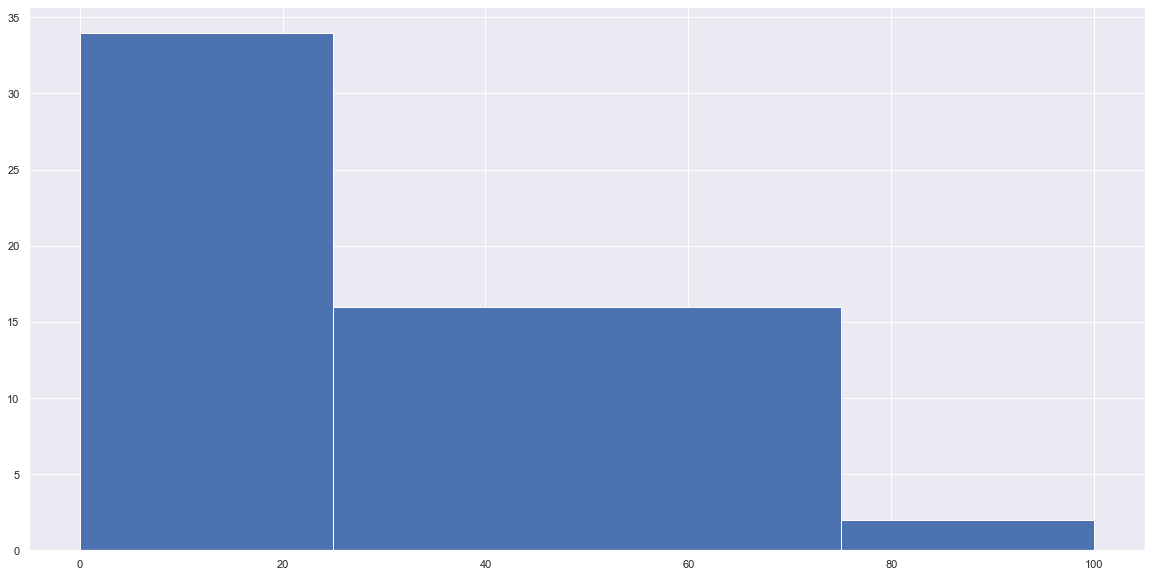

In [46]:
plt.hist(df.groupby('Category')['SellPrice'].median(), bins=[0, 25, 75, 100])

(array([392., 142.,  23.]),
 array([  0,  25,  75, 100]),
 <BarContainer object of 3 artists>)

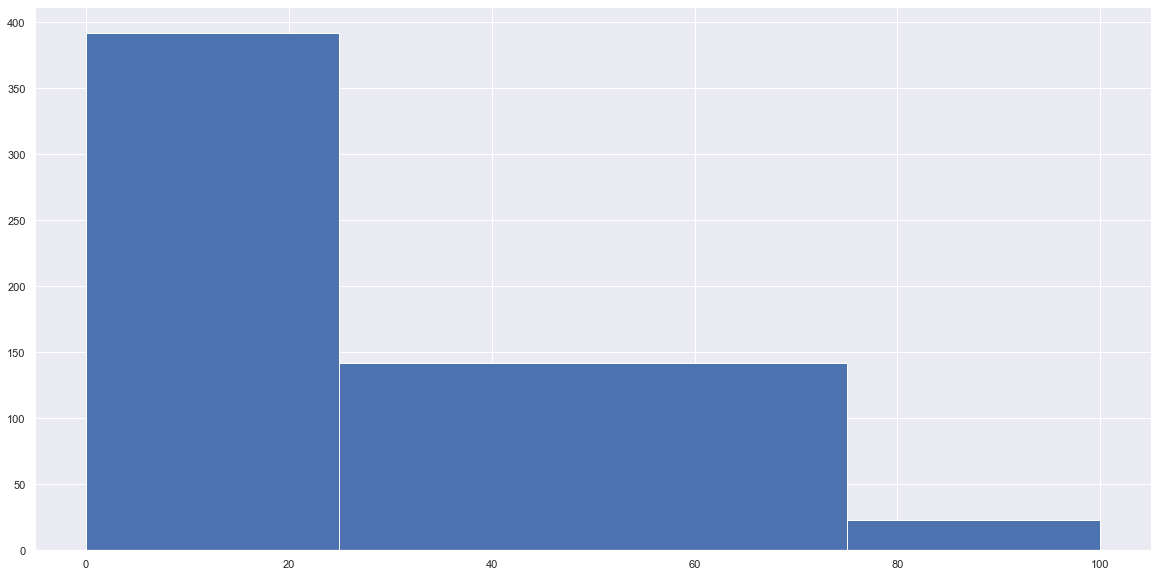

In [47]:
plt.hist(df.groupby('SubCategoryNr')['SellPrice'].median(), bins=[0, 25, 75, 100])